<img src="../figures/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
Circuits for Classical Computing 
</td></table>



$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $

In [5]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

# Universal Classical Computing

In classical computing, the unit of information is the bit, an integer variable $x = 0,1 \in {\mathbb Z}_2$. The elementary logic gates are,
- on one bit, the NOT gate $x\to \neq x = x\oplus 1$,

- on two bits the AND, OR, XOR, and NAND gates
<br>
$$
\begin{array}{|c|c|c|c|c|}
\hline x,y & \hbox{AND} ~ (x\land y)  & \hbox{OR} ~  (x \lor y) & \hbox{XOR} ~ (x\oplus y) & \hbox{NAND} ~ \neg(x\land y)\\
\hline 00 & 0 &  0 &   0 & 1 \\
\hline 01 & 0 &  1 &  1 & 1\\
\hline 10 & 0 &  1 &  1 & 1\\
\hline 11 & 1 &  1 &  0 & 0 \\
\hline 
\end{array}
$$

<br>
<br>

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
    <b>Theorem:</b> (<i> Universal classical computation</i>) 
<br>
<br>
any function
<br>$$
f : \{0,1\}^n \to \{0,1\}^m
$$
<br> can be constructed using a concatenation of elementary gates NOT, AND, OR, and XOR.
</div>

<br>
The question arises as to whether quantum computing will be able to contain classical computing by acting on simple qubits $\{\ket{0},\ket{1}\}$ (without superpositions)

For example: the classical NOT gate is identical to the quantum X gate

$$
X\ket{x} \to \ket{\neg x}
$$



With respect to operations on *two bits*, we encounter a difficulty:

- quantum gates are unitary and, therefore, reversible.

- but classical gates are functions from the space of 2 bits to 1 bit. For this reason, *none of these operations is invertible*

However, if we keep memory of the first record, $x$, the XOR function becomes invertible
<br>

$$ \hbox{XOR} : ( 00,01,10,11) \to  (00, 01, 11, 10 )$$

Not so with the others, which need to include an extra (auxiliary) bit.

This formalism, called *reversible classical computation*, is a branch of classical computation.

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Theorem:</b> 
all classical logic gates NOT, AND, OR, XOR, and NAND can be implemented in a quantum circuit in terms of the Toffoli gate (CCNOT)
</div>


- The implementation of $\hbox{NOT}$
<br>
<br>
$$
\hbox{NOT}   ~\to~  {\rm CCNOT} \ket{1,1,x} = \ket{1,1,\neg x }
$$
<br>
 is immediate because ${\rm CCNOT}$ applied to $\ket{1,1,x}$ necessarily acts as $X$ on the third bit.

- The implementation of $\hbox{AND}$ 
<br>
<br>
$$  
\hbox{AND}  ~\to~ {\rm CCNOT} \ket{x,y,0} = \ket{x,y, x  \land y} 
$$
<br>
is directly the action of the CCNOT gate

- The implementation of $\hbox{OR}$ is based on *De Morgan's theorem*:
$
x\lor y = \neg(\neg x\land \neg y)\, .
$ In this way
<br>
<br>
<br>
$$
{\rm OR} ~\to~  (X\otimes X\otimes X){\rm CCNOT} (X\otimes X \otimes I) \ket{x,y,0} = \ket{x,y, x \lor y}
$$
<br>
<br>
and the product of operators executes the instruction indicated on the right-hand side.


- The implementation of $\hbox{XOR}$ is based on the fact that, acting on $\ket{1, x, y}$, ${\rm CCNOT}$ reduces to ${\rm CNOT}$ acting on $\ket{x,y}$, which is precisely $\ket{x,x\oplus y}$.
<br>
<br>
$$
{\rm XOR} ~\to~ {\rm CCNOT} \ket{1,x,y} = \ket{1,x, x \oplus y}
$$
<br>
 

<br>
<br>

- The implementation of $\hbox{NAND}$ 
<br>

$$
{\rm NAND} ~\to~  (I\otimes I\otimes X) {\rm CCNOT}  \ket{x,y, 0} =  \ket{x,y, \neg (x \land y)}  
$$
<br>


# Preparing an Initial State


Many quantum algorithms require the preparation of an appropriate initial state

$$
U : \ket{0} \to  \sum_{i=0}^{2^n-1} c_i\ket{i}
$$



Let's separate the complex amplitudes into modulus and phase $c_i = a_i e^{i\gamma_i}$ where $a_i = |c_i|$.  


Let's look at the case $n=2$. The circuit that allows us to prepare a generic state is the following


<br>
<figure><center>
<a id='fig_ref'></a>
<img src="images/preparestatecircuit.png" align=center width='60%'/>
<center></center>
</center></figure>
<br>
where 
$$
R_y(\theta) = \begin{bmatrix} \cos\displaystyle\frac{\theta}{2} & -\sin\displaystyle\frac{\theta}{2} \\
 \sin\displaystyle\frac{\theta}{2}  & \cos\displaystyle\frac{\theta}{2} \end{bmatrix}~~~~, ~~~~~
D(\gamma_i,\gamma_j ) = \begin{bmatrix} e^{i\gamma_i} & 0 \\ 0 & e^{i\gamma_j} \end{bmatrix} = K(\gamma_i) P(\gamma_j-\gamma_i)
$$

The state at the barrier will be

\begin{eqnarray}
\ket{\psi_0}~~ &=&~~ \cos\theta_1 \ket{0}\otimes \big( \cos\theta_2 \ket{0} + \sin\theta_2\ket{1}\big) + \sin\theta_1\ket{1}\otimes \big(\cos\theta_3\ket{0} + \sin\theta_3\ket{1}\big) \nonumber \\&=& ~~ \cos\theta_1 \cos\theta_2 \ket{00} + \cos\theta_1\sin\theta_2\ket{01} + \sin\theta_1\cos\theta_3\ket{10} + \sin\theta_1\sin\theta_3\ket{11} \rule{0mm}{8mm}
\end{eqnarray}


from which we obtain four equations for four unknowns

\begin{eqnarray}
a_1 &=& \cos\theta_1 \cos\theta_2 \nonumber\\ \rule{0mm}{6mm}
a_2 &=&  \cos\theta_1\sin\theta_2\nonumber\\  \rule{0mm}{6mm}
a_3 &=&  \sin\theta_1\cos\theta_3\nonumber\\  \rule{0mm}{6mm}
a_4 &=& \sqrt{1-a_1^3-a_2^2-a_3^2} \rule{0mm}{6mm}
\end{eqnarray}

we only need 3 angles to represent 4 amplitudes due to the constraint $\sum_i a_i^2 = 1$.


Once the amplitudes are set, the last part of the circuit is equivalent to the unitary operator

$$
U= \begin{bmatrix} e^{i\gamma_1} & 0 & 0 & 0 \\ 0 & e^{i\gamma_2} & 0 & 0 \\ 0 & 0 & e^{i\gamma_3} & 0 \\ 0 & 0 & 0 & e^{i\gamma_4} \end{bmatrix}=\begin{bmatrix} K(\gamma_1)P(\gamma_2-\gamma_1) & 0 \\ 0 &K(\gamma_3) P(\gamma_4-\gamma_3) \end{bmatrix}  =\ket{0}\bra{0}D(\gamma_1,\gamma_2) + \ket{1}\bra{1}D(\gamma_3,\gamma_4)  
$$


<div class="alert alert-block alert-success">
    <b>Exercise 1.3.2.1</b> 

    
Design the circuit that initializes a generic state of $n=3$ qubits. Use it to introduce the state
<br>    
$$
\ket{\psi} = \frac{1}{4}\left( \rule{0mm}{5mm} \ket{000}-3\ket{001}-\ket{010} +2\ket{110}-\ket{111} \right)
$$
</div>



Evidently, this circuit cannot be efficient since it is necessary to adjust a number $2*2^n$ of parameters.
<br>
<br>
```

In some cases, it is indeed possible to find an efficient circuit. 
<br>
<br>
For example, the initial state, which is a homogeneous superposition of basis elements

$$
\ket{\psi} = W \ket{0}  = \ket{+}^{\otimes n}= \frac{1}{\sqrt{n}}\sum_{i=1}^{2^n-1} \ket{i}
$$

is obtained with a circuit of **cost** = $n~$ and $~$ **depth**=1

# Digital Functions


**Motivation:**

A class of problems in which quantum computing promises to achieve an advantage over classical computing is called <i>oracle query algorithms</i>

It involves classifying classical functions according to chosen properties of a certain set

Generically, like the set of functions itself, it is an NP complexity problem

<br>

```



- These *classic functions* are black boxes called **oracles** that we can only *invoke* as many times as desired.

<br>

- The set of *classes* to which they can *a priori* belong are called **promises**.
<br>

<br>
<br>
To test an oracle interrogation algorithm, it is necessary to build them even though they will be secret to the user.

<br>

**Digital Functions**

A classical computing process breaks down a _digital function_ into elementary gates 
<br>
<br>

$$
f : \{0,1\}^n ~~\to ~~\{0,1\}^m
$$


The construction of $f$ is equivalent to the specification of $m$ **binary** functions $f_1,f_2,...,f_m$
<br>
<br>

$$
f_i : \{0,1\}^n ~~\to ~~\{0,1\}
$$ 
<br>

It is evident that no binary function is invertible for $m\geq 2$. 

<br>


If we want to encompass classical computing within quantum computing, this fact represents a drawback, because quantum circuits are, by nature, reversible.


<br>

The simplest way to create, from a non-invertible map $f$, another invertible $U_f$, involves *preserving* the values of the initial variables 



For $f:\{0,1\}^n \to \{0,1\}$ we need a total of $n+1$ qubits:

- $n$ qubits that contain the argument of the function, $\ket{x}_n \in \mathbb{C}^n$, 

- 1 qubit that will store the result, $\ket{y} \in \mathbb{C}$.


Let $U_f$ be the following operator

\begin{equation}
U_f : \ket{x}\ket{y} \longrightarrow \ket{x} \ket{ y \oplus f(x) }
\end{equation}

Where $\oplus$ indicates addition modulo 2.

It is evident from the definition that $U_f\cdot U_f = I$.

## Construction of Binary Functions. The Min-Terms

It is very simple to establish a general method for constructing binary functions of the form $f: \{0, 1\}^n \rightarrow \{0, 1\}$.

Consider the following truth table for a specific function $f: \{0, 1\}^3 \rightarrow \{0, 1\}$.
<br>

$$
\begin{array}{||c|c|c||c||}
\hline
  x_2 & x_1 & x_0 &   f(x) \\  \hline\hline
      0 & 0 & 0 &  0  \\ \hline
 0& 0 & 1 & 1   \\ \hline
 0& 1 & 0 & 0   \\ \hline
 0& 1 & 1 & 0   \\ \hline
 1& 0 & 0 & 0   \\ \hline
 1& 0 & 1 & 1   \\ \hline
 1& 1 & 0 & 0   \\ \hline
 1& 1 & 1 & 1   \\ \hline
\end{array}
$$


The idea is to consider exclusively the terms that have the variable 1 as output, which we will call <b>min-terms</b>.

For example, there is a min-term of the form $101 \to 1$ that can be obtained through a gate like the following

<br>
<br>
<div>
<img src="images/ctrl5.png" width="10%" style="margin:auto"/>
</div>
<br>

Each min-term will have a different associated conditional gate. Its composition defines the function $f$.

For the case of the previous truth table, the corresponding circuit will be given by:

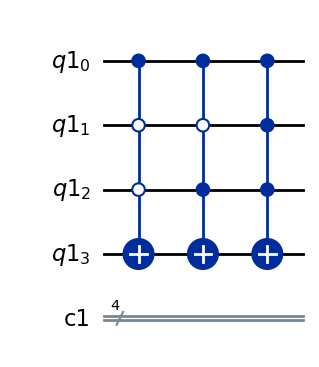

In [6]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.circuit.library import MCXGate

qr = QuantumRegister(4)
cr = ClassicalRegister(4)

qc = QuantumCircuit(qr, cr, name='q')

qc.append(MCXGate(3, ctrl_state=1), qr)
qc.append(MCXGate(3, ctrl_state=5), qr)
qc.append(MCXGate(3, ctrl_state=7), qr)

qc.draw(output='mpl')

where we have made use of the multicontrolled gate [MCXGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html?highlight=mcxgate#qiskit.circuit.library.MCXGate) from qiskit

We are going to implement a function $f:\{0,1\}^4\to \{0,1\}^4$ given by the following *truth table* 

<br>
$$
\begin{array}{|c|c || c | c | }
\hline
x & f(x) & & x & f(x) \\  \hline
0000 & 1111 && 1000 & 0101 \\ \hline
0001 & 1011 && 1001 & 0100 \\ \hline
0010 & 0011 && 1010 & 0000 \\ \hline
0011 & 1000 && 1011 & 1110 \\ \hline
0100 & 0101 && 1100 & 1111 \\ \hline
0101 & 0100 && 1101 & 1011 \\ \hline
0110 & 0000 && 1110 & 0011 \\ \hline
0111 & 1110 && 1111 & 1000 \\ \hline
\hline
\end{array}
$$

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import MCXGate

In [9]:
def oracle(f_outputs): 
    
    n = int(np.log2(len(f_outputs)))  #dimension del registro de entrada |x> 
    m = len(f_outputs[0])             #dimension del registro de salida |f(x)>
    
    #generamos todos los posibles inputs en binario, completando con ceros hasta tener strings de n bits
    inputs = [format(i, 'b').zfill(n) for i in range(2**n)]
    print(inputs)
    
    qr_input = QuantumRegister(n, name='input')
    qr_output = QuantumRegister(m, name='output')
    qc = QuantumCircuit(qr_input, qr_output)


    # Hacemos un bucle sobre los inputs
    for i,input_str in enumerate(inputs):
        ctrl_state= int(input_str[::],2)
        # Para cada input, i, haz un bucle sobre cada bit del output     
        for j,output_bit in enumerate(f_outputs[i]):
            if output_bit =='1':
                qc.append(MCXGate(len(input_str), ctrl_state=ctrl_state),qr_input[:]+[qr_output[n-j-1]])  

    return qc

['000', '001', '010', '011', '100', '101', '110', '111']


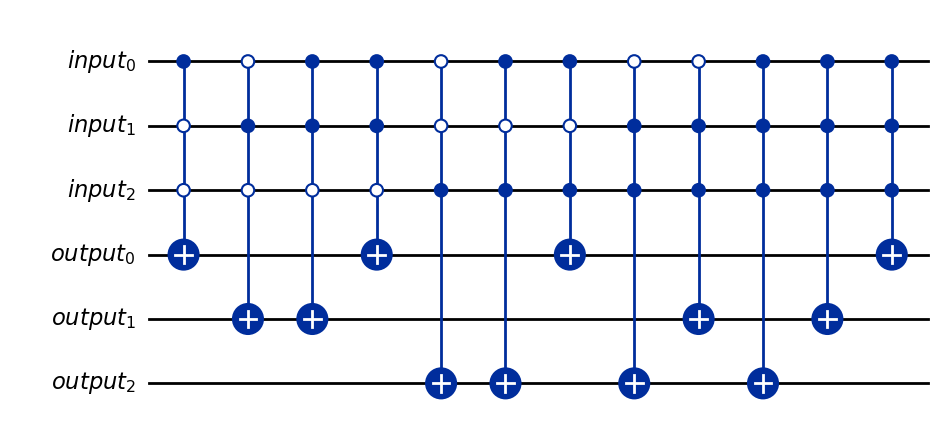

In [12]:
f_outputs = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

f_outputs= ['000', '001', '010', '011', '100', '101', '110', '111']
    
oracle(f_outputs).draw('mpl')

['000', '001', '010', '011', '100', '101', '110', '111']


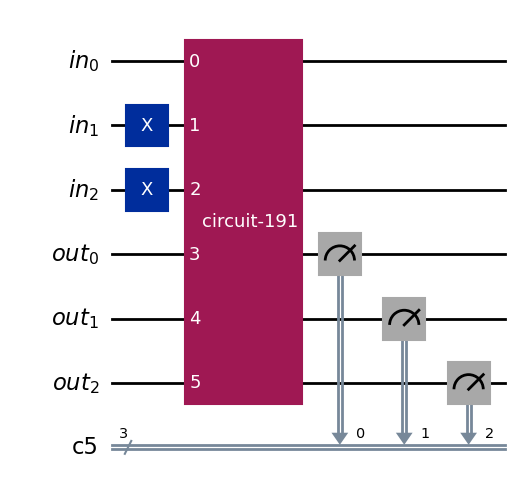

In [17]:
n=3
qr_in = QuantumRegister(n, name='in')
qr_out = QuantumRegister(n, name='out')
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr_in,qr_out,cr)


qc.x(1)
qc.x(2)
qc.append(oracle(f_outputs),qr_in[:]+qr_out[:])
qc.measure(qr_out,cr)

qc.draw('mpl')

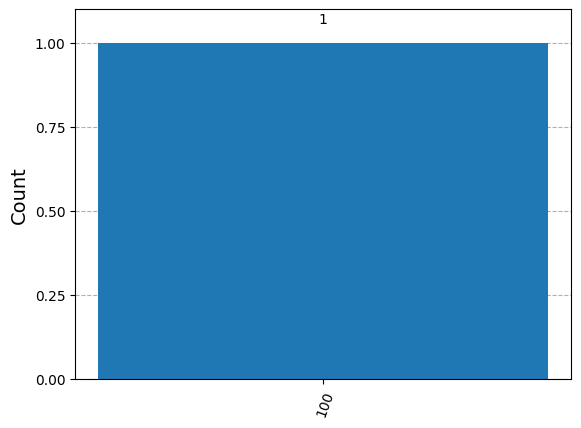

In [15]:
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
n_tiradas = 1

backend = AerSimulator()
qct = transpile(qc, backend)
counts  = backend.run(qct, shots = n_tiradas).result().get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)


<div class="alert alert-block alert-success">
    <b> Exercise 1.3.2.2 </b>
       
Write a function $f:S^n\to S$ that randomly produces $f(x) = \pm 1$ in a <i>balanced</i> way (i.e., as many $f(x)= +1$ as $f(x)= -1$). 


<details>
<summary><p style='text-align:right'> >> Solution </p></summary>
See for example the solution in the qiskit textbook: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html section 4.4 
</details>

</div>


## Linear Binary Function:

Given two binary n-tuples $x=(x_{n-1},\ldots,x_0)$ and $a=(a_{n-1},\ldots,a_0)$, we define the **linear function**
<br>
        
\begin{equation}
f(x;a) = a \cdot x = a_{n-1} x_{n-1} \oplus a_{n-2} x_{n-2} \oplus \cdots \oplus a_{0} x_{0}\; ,
\end{equation}

<br>
where $\oplus$ is addition modulo 2.


For example, the circuit that implements this function when $a=11010$ is the following

<br>
<br>

<div>
<img src="images/linear_function.png" width="35%" style="margin:auto"/>
</div>
<br>


<div class="alert alert-block alert-success">
    <b> Exercise 1.3.2.3 </b>
       

 Complete the following code that generates the circuit associated with the linear binary function $f(x;a)$. 
    
    
<details>
<summary><p style='text-align:right'> >> Solution </p></summary>
    
    for i, aq in enumerate(reversed(a)):
        if aq == '1':
             qc.cx(qr_in[i],qr_out) 

</details>
</div>


In [15]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

def linear_circuit(x,a):
       
    assert(len(x)==len(a))

    # Inicialización de los registros
    qr_in = QuantumRegister(len(a), name='qr_in')
    qr_out = QuantumRegister(1, name='qr_out')
    cr = ClassicalRegister(1, name='cr')  
    qc = QuantumCircuit(qr_in, qr_out, cr, name='q_linear')
    
    'inicializamo el estado x '
    for i, xq in enumerate(reversed(x)):  # ojo con la ordenación de qiskit, por eso está reversed()
        if xq == '1':
             qc.x(qr_in[i]) 

    qc.barrier()

    'codificamos la función lineal x.a '
    for i, aq in enumerate(reversed(a)):
        if aq == '1':
             qc.cx(qr_in[i],qr_out) 
            
    qc.barrier()
    qc.measure(qr_out[0],cr[0])
    
    return qc 

Let's see an example

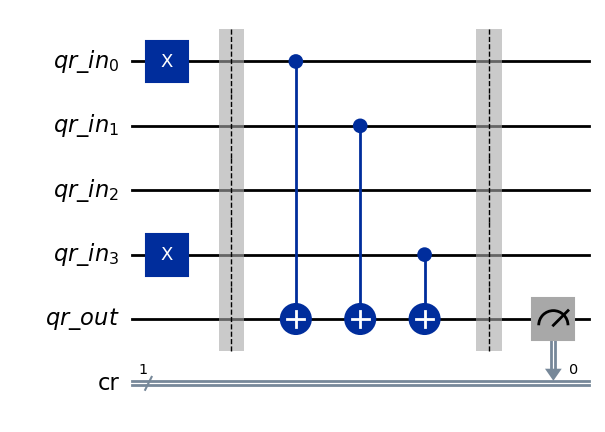

In [17]:
a = '1011'
x = '1001'

qc=linear_circuit(x,a)
qc.draw('mpl')

The function $a\cdot x = (1 + 0 + 0 + 1)mod(2) = 0$. Let's see if this result is the one found

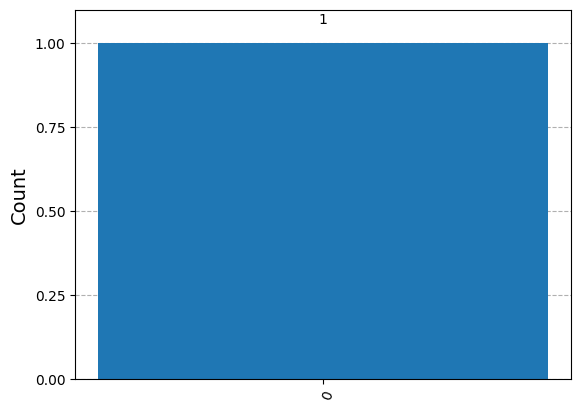

In [ ]:
n_tiradas = 1

counts = backend.run(qc,shots = n_tiradas).result().get_counts()

plot_histogram(counts)

<div class="alert alert-block alert-success">
    <b> Exercise 1.3.2.4</b>

Let the function $f(x) = x^2$ be over the set of values $x\in \{0,1,2,3\}$. Find the truth table in binary and construct the oracle that implements this function.
    
</div>

# Boolean <i>oracles</i> and phase

In the previous section, we defined the operator $U_f$ using an ancilla qubit

<br>

$$
U_f \ket{x}\otimes\ket{y} = \ket{x}\ket{y + f(x)}
$$

<br>

We can use $U_f$ in 2 different ways to *encode the oracle* of a binary function $f(x)$


## Boolean *Oracle*

<br>

$$
U_f \ket{x}\otimes\ket{0} = \ket{x}\ket{f(x)}
$$
<br>

<div class="alert alert-block alert-danger">
<p style="text-align: center;"> <p style="text-align: left  ">  
    
- specifying $\ket{y}=\ket{0}$ encodes the function $f(x)$ in the *state of the second qubit*
<br>
<br>
- oracles based on this encoding are called **boolean oracles**
</div>

## Phase Oracle

<br>

Nothing prevents us from initializing the ancilla in an *eigenvector* of $U_f$


<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Theorem:</b> the eigenvectors of $U_f$ are the states $\ket{x}\otimes \ket{\pm}$ 
</div>


*Proof:*

On one hand, we know that the *eigenvalues* must be $\pm 1$ given that $U_f^2 = I$. 
Let's examine each case

\begin{eqnarray}
U_f\ket{x}\otimes \ket{+} &=& \ket{x}\otimes \frac{1}{\sqrt{2}}\left( \rule{0mm}{6mm}\ket{0\oplus f(x)}+\ket{1\oplus f(x)} \right) = \ket{x}\otimes \ket{+} \nonumber\\
U_f\ket{x}\otimes \ket{-} &=& \ket{x}\otimes \frac{1}{\sqrt{2}}\left( \rule{0mm}{6mm} \ket{0\oplus f(x)}-\ket{1\oplus f(x)}\right) = (-1)^{f(x)} \ket{x}\otimes \ket{-}
\end{eqnarray}

where we see that a typical *phase kickback* effect occurs

<div class="alert alert-block alert-danger">
<p style="text-align: center;"> <p style="text-align: left  ">  
<b>In summary:</b>

-  specifying $\ket{y} = \ket{-}$ we encode $f(x)$ in *the phase* $~\to ~(-1)^{f(x)} = e^{i\pi f(x)}$
<br>
<br>
-  oracles based on this encoding are called **phase oracles**
</div>